# K-means clustering

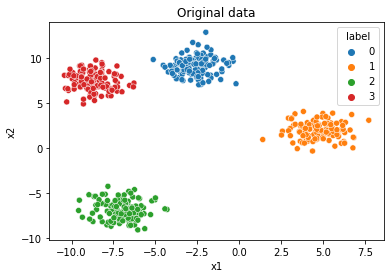

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, y = make_blobs(500, centers = 4, random_state = 42, cluster_std = 1)

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)

sns.scatterplot(data = df, x = "x1", y = "x2", hue = "label", palette = "tab10")
plt.title("Original data");

In [27]:
X = df.drop("label", axis = "columns")
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature scale data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:3]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895]])

In [35]:
scaled_X.mean(), scaled_X.std()

(-1.0658141036401503e-17, 1.0)

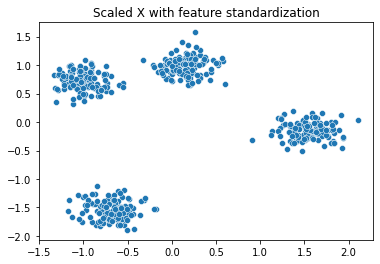

In [39]:
sns.scatterplot(x = scaled_X[:,0], y = scaled_X[:,1])
plt.title("Scaled X with feature standardization");

## K-means clustering

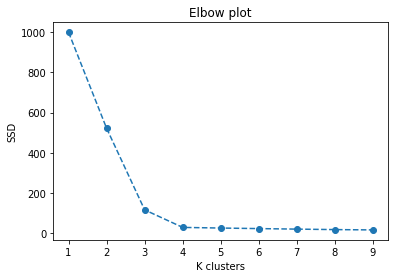

In [50]:
from sklearn.cluster import KMeans

clusters = np.arange(1,10)
sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, "--o")
ax.set(title = "Elbow plot", xlabel = "K clusters", ylabel = "SSD");

In [53]:
pd.Series(sum_squared_distances).diff()[1:]

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.174395
5     -2.749879
6     -2.605588
7     -2.373666
8     -1.602846
dtype: float64

## Silhuette score

[Text(0.5, 1.0, 'Silhouette plot'),
 Text(0.5, 0, 'k clusters'),
 Text(0, 0.5, 'silhouette score')]

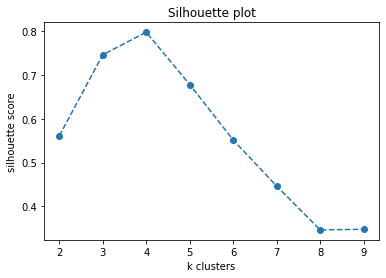

In [ ]:
from sklearn.metrics import silhouette_score

fig, ax  = plt.figure(), plt.axes()

kmeans = [KMeans(k).fit(scaled_X) for k in clusters]
# silhouette scores requires clusters >= 2
silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_scores, "--o")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "silhouette score")

## Visualization

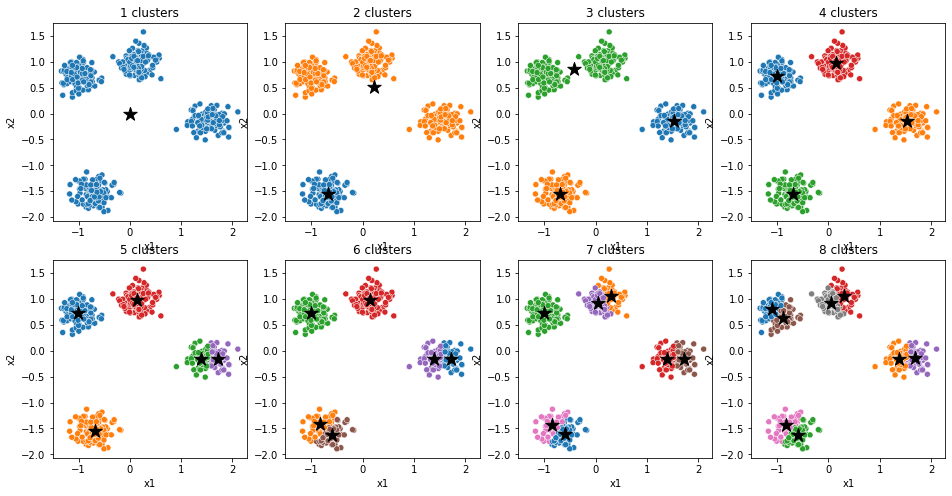

In [77]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

num_plots_row = round(len(clusters)/2)
fig, axes = plt.subplots(2, num_plots_row, figsize = (16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x = "x1", y = "x2", hue="label", ax = ax, palette="tab10")
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "*", s=200, color = "black")
    ax.legend([], [], frameon = False)
    ax.set(title = f"{i+1} clusters")

In [70]:
kmeans[2].cluster_centers_

array([[ 1.53895017, -0.15301193],
       [-0.68486276, -1.54855438],
       [-0.42704371,  0.85078316]])